## Deep Learning Applied to Images - Fine-tuning

#### Prof. Thomas da Silva Paula

### Using fine-tuned model for inference

* Using Pytorch
* Using Resnet18 trained on Stanford dogs dataset (http://vision.stanford.edu/aditya86/ImageNetDogs/)

### Imports

In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

from PIL import Image

from torchvision import models
from torchvision import transforms

### Setting up data transforms

In [2]:
num_classes = 120

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

### Creating the model

In [3]:
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, num_classes)

### Loading weights

In [4]:
model.load_state_dict(torch.load('resnet18_dogs.th').module.state_dict())
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Testing predictions

In [5]:
with open('dog_classes.npy', 'rb') as f:
    dog_classes = np.load(f)

In [7]:
dog_classes[:40]

array(['n02085620-Chihuahua', 'n02085782-Japanese_spaniel',
       'n02085936-Maltese_dog', 'n02086079-Pekinese',
       'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel',
       'n02086910-papillon', 'n02087046-toy_terrier',
       'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound',
       'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound',
       'n02088632-bluetick', 'n02089078-black-and-tan_coonhound',
       'n02089867-Walker_hound', 'n02089973-English_foxhound',
       'n02090379-redbone', 'n02090622-borzoi',
       'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound',
       'n02091134-whippet', 'n02091244-Ibizan_hound',
       'n02091467-Norwegian_elkhound', 'n02091635-otterhound',
       'n02091831-Saluki', 'n02092002-Scottish_deerhound',
       'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier',
       'n02093428-American_Staffordshire_terrier',
       'n02093647-Bedlington_terrier', 'n02093754-Border_terrier',
       'n02093859-Kerry_blue

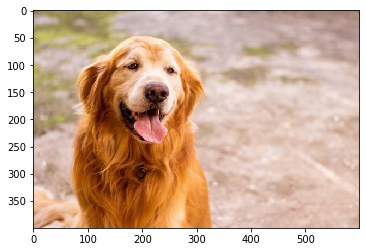

In [8]:
path = 'sample_images/dog.jpg'
img = Image.open(path)
plt.imshow(img)

In [9]:
x = transform(img)
x = torch.unsqueeze(x, dim=0)
preds = model(x)
predicted_cls = np.argmax(preds.cpu().detach().numpy(), axis=1)
print(dog_classes[predicted_cls[0]])

n02099601-golden_retriever


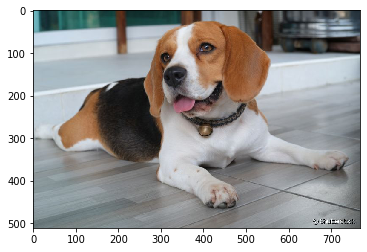

In [10]:
path = 'sample_images/dog2.jpg'
img = Image.open(path)
plt.imshow(img)

In [11]:
x = transform(img)
x = torch.unsqueeze(x, dim=0)
preds = model(x)
predicted_cls = np.argmax(preds.cpu().detach().numpy(), axis=1)
print(dog_classes[predicted_cls[0]])

n02088364-beagle
